## Лабораторная работа № 6
### Модель "хищник-жертва"

### Постановка задачи
Исследуем двухвидовую модель «хищник – жертва», впервые построенную Вольтерра для объяснения колебаний рыбных уловов.
Имеются два биологических вида численностью в момент времени $t$ соответственно $x(t)$ и $y(t)$. Особи первого вида являются пищей для особей второго вида (хищников). Численности популяций в начальный момент времени известны. Требуется определить численность видов в произвольный момент времени.
Математической моделью задачи является система дифференциальных уравнений Лотки – Вольтерра:
$$
\begin{cases}
\large{\frac{dx}{dt} = (a-by)x}\\
\large{\frac{dy}{dt} = (-c+dx)y}\\
\end{cases}
$$
где $a, b, c, d$ – положительные константы. Проведем расчет численности популяций при $a = 3, c = 1, d = 1$ для трех значений параметра $b = 4;3;2$. Начальные значения положим $x(0) = 2, y(0) = 1$.


-Graphics-
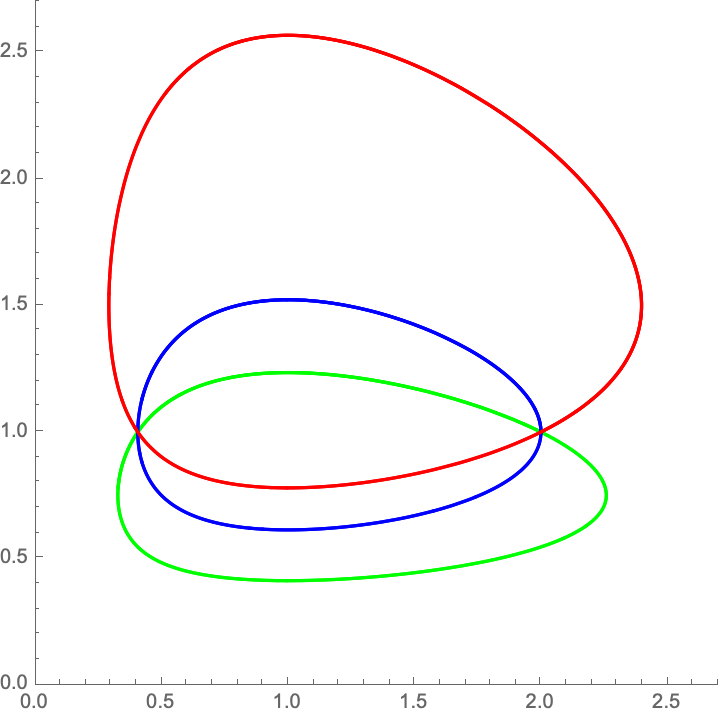

In [70]:
x = .
y = .
{a, c, d} = {3, 1, 1};
colors = {Red, Blue, Green};

plt = {};
For[b = 4, b > 1, b--,
    equalX[t_] := x'[t] == x[t] * (a - b * y[t]);
    equalY[t_] := y'[t] == y[t] * (d * x[t] - c);
    (* найдем численное решение уравнений на промежутке 0:9 *)
    sol = NDSolve[{equalX[t], equalY[t], x[0] == 2, y[0] == 1}, {x, y}, {t, 0, 9}, MaxSteps -> 3000];
    (* рисуем графики *)
    plt = Append[plt, ParametricPlot[Evaluate[{x[t], y[t]} /. sol], {t, 0, 9}, PlotRange -> {{0, 2.7}, {0, 2.7}}, PlotStyle -> colors[[b - 1]]]]
]
Show[plt]

In [81]:
predPrey[aa_, bb_, cc_, dd_] := Module[
    {
        a = aa, 
        b = bb, 
        c = cc, 
        d = dd
    },
(*     plt = {}; *)
    eq1[t_] := x'[t] == x[t] * (a - b * y[t]);
    eq2[t_] := y'[t] == y[t] * (-c + d * x[t]);
    sol = NDSolve[{eq1[t], eq2[t], x[0] == 2, y[0] == 1}, {x, y}, {t, 0, 7}, MaxSteps -> 3000];
    plt = Append[plt, ParametricPlot[Evaluate[{x[t], y[t]} /. sol], {t, 0, 7}, PlotRange -> {{0, 3}, {0, 3}}]];
    plt
];

In [ ]:
{min, max, step} = {1, 4, 1};
Manipulate[
    Show[
        predPrey[a, b, c, d]
    ], 
    {a, min, max, step}, 
    {b, min, max, step}, 
    {c, min, max, step}, 
    {d, min, max, step}
    ];